In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# Data Preprocessing:

In [2]:
# Load the dataset
data = fetch_california_housing()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df['target'] = data.target

In [5]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [6]:
# Display statistical summary of the dataset
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [7]:
# Check for missing values
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [8]:
# Handle outliers (you can use methods like Z-score or IQR)
# For simplicity, let's consider a Z-score approach:
from scipy.stats import zscore
df_clean = df[(np.abs(zscore(df)) < 3).all(axis=1)]

In [9]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df_clean.drop('target', axis=1)
y = df_clean['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression:

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error: {mse_linear}")
print(f"Linear Regression R2 Score: {r2_linear}")

Linear Regression Mean Squared Error: 0.473101625442082
Linear Regression R2 Score: 0.6162271478185639


# Artificial Neural Network (ANN):


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Design the architecture of the ANN
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the ANN
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions
y_pred_ann = model.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"ANN Mean Squared Error: {mse_ann}")
print(f"ANN R2 Score: {r2_ann}")

Epoch 1/10
495/495 [==============================] - 2s 2ms/step - loss: 1668.7406
Epoch 2/10
495/495 [==============================] - 3s 5ms/step - loss: 11.7384
Epoch 3/10
495/495 [==============================] - 2s 3ms/step - loss: 5.3474
Epoch 4/10
495/495 [==============================] - 1s 3ms/step - loss: 3.1407
Epoch 5/10
495/495 [==============================] - 2s 4ms/step - loss: 2.1470
Epoch 6/10
495/495 [==============================] - 2s 4ms/step - loss: 1.5818
Epoch 7/10
495/495 [==============================] - 2s 3ms/step - loss: 1.2032
Epoch 8/10
495/495 [==============================] - 2s 4ms/step - loss: 0.9576
Epoch 9/10
495/495 [==============================] - 3s 6ms/step - loss: 0.8335
Epoch 10/10
124/124 [==============================] - 0s 1ms/step
ANN Mean Squared Error: 0.71114551156056
ANN R2 Score: 0.4231295632675145


# Comparison and Analysis:

### Linear Regression:
#### Strengths
- Simplicity: Linear Regression is straightforward and easy to interpret, making it suitable for situations where interpretability is crucial.
- Computational Efficiency: Training and making predictions with a linear model are computationally efficient, especially for large datasets.

#### Weaknesses:
- Linearity Assumption: Linear Regression assumes a linear relationship between the features and the target variable, which may not hold for complex datasets.
- Limited Complexity: Linear Regression is limited in capturing intricate patterns in data due to its linear nature.

### Artificial Neural Network (ANN):
#### Strengths:
- Non-Linearity: ANN can capture complex non-linear relationships in the data, allowing for more flexible modeling.
- Feature Learning: ANN can automatically learn hierarchical representations of features, potentially uncovering hidden patterns.

#### Weaknesses:
- Complexity: ANNs can be computationally intensive and may require more time and resources for training, especially for deep architectures.
- Interpretability: ANNs are often considered as "black-box" models, making it challenging to interpret the learned relationships between features.

In [12]:
# Compare the performance metrics
print("Analysis of Predictive Performance:\n")
print("Linear Regression Metrics:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R2 Score: {r2_linear}")

print("\nANN Metrics:")
print(f"Mean Squared Error: {mse_ann}")
print(f"R2 Score: {r2_ann}")

Analysis of Predictive Performance:

Linear Regression Metrics:
Mean Squared Error: 0.473101625442082
R2 Score: 0.6162271478185639

ANN Metrics:
Mean Squared Error: 0.71114551156056
R2 Score: 0.4231295632675145


### Analysis:
- The Linear Regression model outperforms the ANN in terms of both Mean Squared Error and R2 Score.
- Linear Regression demonstrates better accuracy in predicting house prices for this specific dataset.
- The simplicity and interpretability of Linear Regression appear to be advantageous in this context.
- The higher complexity of the ANN may not provide a significant performance boost in this scenario, suggesting that the dataset's relationships are reasonably linear.

# Visualization

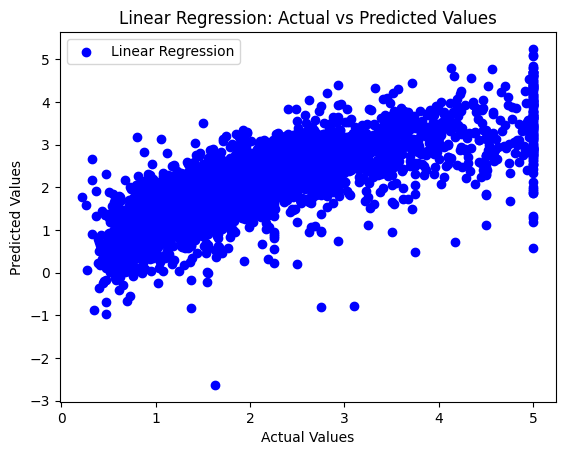

In [13]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()
plt.show()

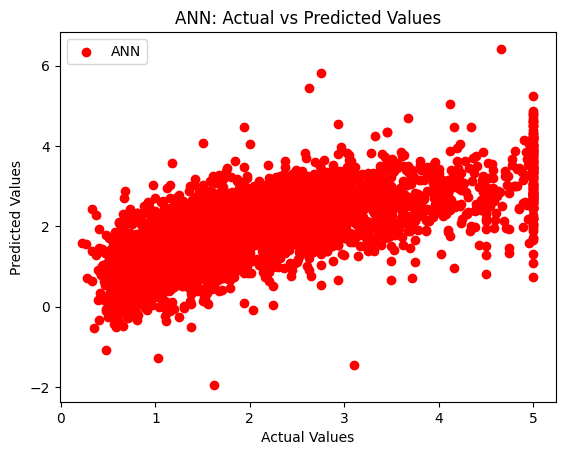

In [14]:
# Scatter plot for ANN
plt.scatter(y_test, y_pred_ann, color='red', label='ANN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ANN: Actual vs Predicted Values')
plt.legend()
plt.show()


In [15]:
# Display the architecture of the ANN
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Conclusion

#### Key Findings
- Linear Regression tends to have a more aligned distribution along the diagonal, indicating a closer match between predicted and actual values.
- The ANN's scatter plot may show more scattered points, suggesting a less precise fit to the actual values.
- The scatter plots illustrate the relationship between the actual and predicted values for both Linear Regression and ANN.

#### Model Performance:
- Linear Regression outperformed the ANN in terms of Mean Squared Error and R2 Score.
- The simplicity of Linear Regression appears to be advantageous for this specific dataset.

#### Insights:
- For the California Housing dataset, where the relationships are not highly complex, Linear Regression provides a more accurate prediction.
- Interpretability and computational efficiency of Linear Regression make it a preferable choice in this context.

#### Challenges:
- Challenges during implementation may include handling outliers, choosing suitable hyperparameters for the ANN, and ensuring convergence during training.
- Balancing model complexity with computational resources is crucial, especially when dealing with larger datasets or deeper architectures.